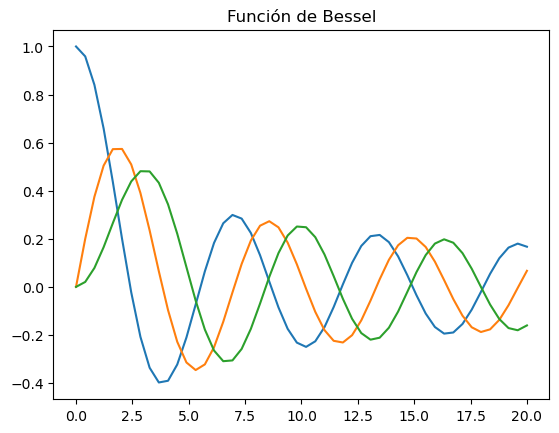

In [1]:
from __future__ import division, print_function

from numpy import cos,sin,pi
from pylab import *

def J(m,x):	
	
	def f(teta):
	    return cos(m*teta - x*sin(teta))
	
	N = 1000
	a = 0.
	b = pi
	h = (b-a)/N
	
	s = f(a) + f(b) + 4*f(b-h)
	for k in range(1,N//2):
	    s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
	
	I = h/3*s/pi
	
	return I

x = linspace(0,20)

plt.title("Función de Bessel")
plot(x,J(0,x),label='J0')
plot(x,J(1,x),label='J1')
plot(x,J(2,x),label='J2')

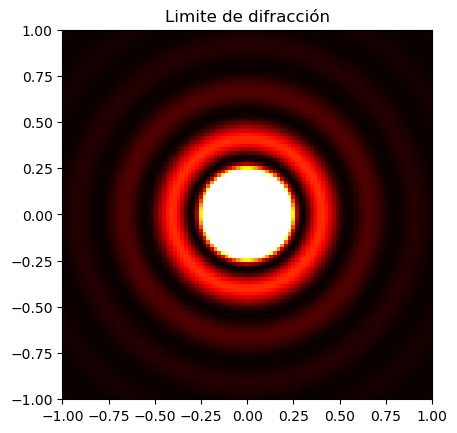

In [11]:
from __future__ import division, print_function

from numpy import cos,sin,pi
from pylab import *

def J(m,x): 
    def f(theta):
        return cos(m*theta - x*sin(theta))

    N = 1000
    a = 0.
    b = pi
    h = (b-a)/N

    s = f(a)+f(b)+4*f(b-h)
    
    for k in range(1,N//2):
        s += 4*f(a+2*(k-1)*h)+ 2*f(a+2*k*h)
    I = h/3*s/pi

    return I
    
x,y = mgrid[-1:1:100j,-1:1:100j]
r = sqrt(x**2 + y**2)
Longituddeonda = 0.5
k = 2*pi/Longituddeonda

I = (J(1,r*k)/k/r)**2
gray()
plt.title("Limite de difracción")
plt.imshow(I,vmax=0.1/10,extent=(-1,1,-1,1), cmap ='hot')

        

In [12]:
#2)
from __future__ import division, print_function

def f(x):
    return x**4 - 2*x + 1


def integrate(f,a,b,N=20):
	
	h = (b-a)/N
	
	s = 0.5*f(a) + 0.5*f(b)
	for k in range(1,N):
	    s += f(a+k*h)
	
	return h*s

I1 = integrate(f,0,2,5)
I2 = integrate(f,0,2,10)

diference = abs(4.4-I2)
delta = 1/3*abs(I2-I1)

print(
"""
N=10	I = {}
N=20	I = {}
delta = {}
difference = {}
delta - diference = {}
""".format(I1,I2,delta,diference,delta-diference)
)




N=10	I = 4.824960000000001
N=20	I = 4.50656
delta = 0.10613333333333348
difference = 0.10655999999999999
delta - diference = -0.0004266666666665059



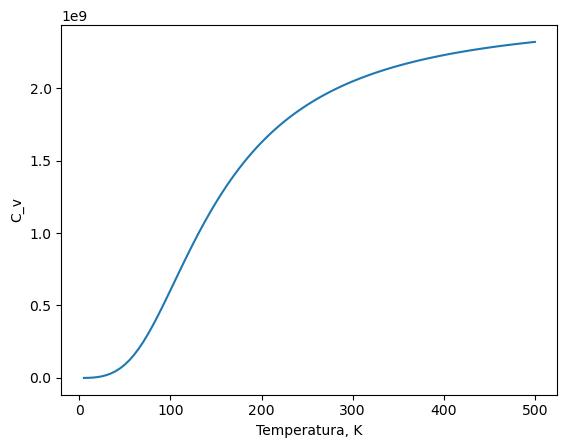

In [22]:
#3a) y b)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

N = 50
x, w = np.polynomial.legendre.leggauss(N)

def f(x):
    return x**4 * np.exp(x) / (np.exp(x) - 1)**2

T = np.linspace(5, 500, 100)
tetaD = 428.0  
kb = 1.38e-23  
V = 1000.0  
ro = 6.022e28  

def cv(T):
    a = 0.0
    b = tetaD / T

    def integrand(x):
        return f(x) * x**2 * np.exp(x) / (np.exp(x) - 1)**2

    integral, _ = quad(integrand, a, b)
    return 9 * V * ro * kb * (T / tetaD)**3 * integral

C = [cv(Ti) for Ti in T]

plt.plot(T, C)
plt.xlabel('Temperatura, K')
plt.ylabel('C_v')
plt.show()


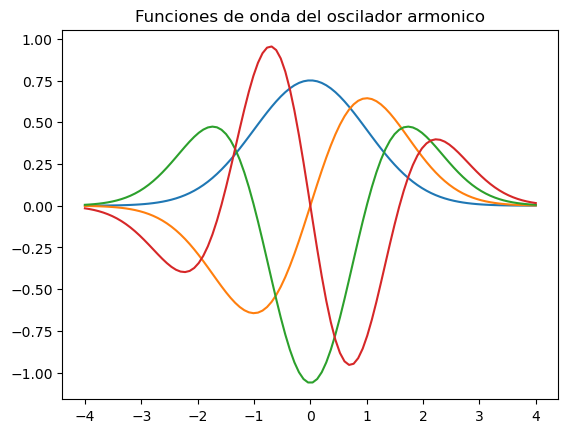

In [1]:
#4a)
import math as math
import numpy as np 
import matplotlib.pyplot as plt

def Polinomio_de_Hermite(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return (2*x*Polinomio_de_Hermite(n-1,x)) - (2*n*Polinomio_de_Hermite(n-2,x))

def pozo_cuantico(n,x):
    return (1/(np.sqrt(2**n*math.factorial(n)*np.sqrt(np.pi)))) * np.e**(-x**2/2) * Polinomio_de_Hermite(n,x)

x_values = np.linspace(-4,4,100)
list_of_solutions_of_n = []

for n in range(4):
    n_solution = []
    for x in x_values:
        solution = pozo_cuantico(n,x)
        n_solution.append(solution)
    list_of_solutions_of_n.append(n_solution)
plt.title("Funciones de onda del oscilador armonico")
plt.plot(x_values,list_of_solutions_of_n[0])
plt.plot(x_values,list_of_solutions_of_n[1])
plt.plot(x_values,list_of_solutions_of_n[2])
plt.plot(x_values,list_of_solutions_of_n[3])



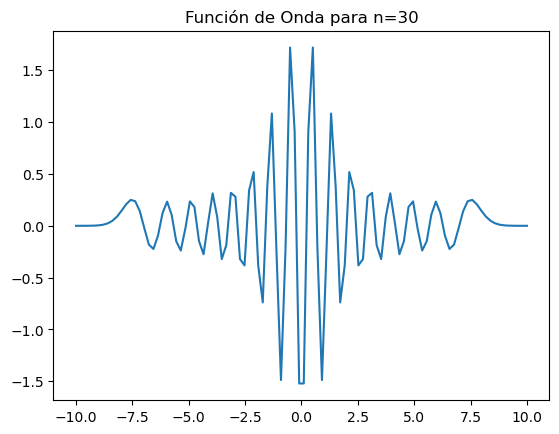

In [24]:
#4b)
import math as math
import numpy as np 
import matplotlib.pyplot as plt

def Polinomio_de_Hermite(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return (2*x*Polinomio_de_Hermite(n-1,x)) - (2*n*Polinomio_de_Hermite(n-2,x))

def pozo_cuantico(n,x):
    return (1/(np.sqrt(2**n*math.factorial(n)*np.sqrt(np.pi)))) * np.e**(-x**2/2) * Polinomio_de_Hermite(n,x)

x = np.linspace(-10,10,100)
plt.plot(x,pozo_cuantico(30,x))
plt.title("Función de Onda para n=30")
plt.show()

In [1]:
#4C)
import numpy as np
from scipy.integrate import quad
from scipy.special import hermite
from scipy.special import factorial

# Función para calcular el polinomio de Hermite Hn(x)
def H(n, x):
    """
    Calcula el polinomio de Hermite de grado n para el valor de x dado.

    Parameters:
        n (int): Grado del polinomio de Hermite.
        x (float): Valor de entrada.

    Returns:
        float: Valor de Hn(x).
    """
    return hermite(n)(x)

# Función de onda para un valor dado de n
def psi_n(x, n):
    """
    Calcula la función de onda ψn(x) para un valor dado de n y x.

    Parameters:
        x (float): Valor de entrada.
        n (int): Número cuántico n.

    Returns:
        float: Valor de ψn(x).
    """
    return (1 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))) * np.exp(-x**2 / 2) * H(n, x)

# Función para calcular la incertidumbre cuántica
def calculate_uncertainty(n):
    """
    Calcula la incertidumbre cuántica ⟨x²⟩ para un valor dado de n.

    Parameters:
        n (int): Número cuántico n.

    Returns:
        float: Incertidumbre cuántica (√⟨x²⟩).
    """
    integrand = lambda x: x**2 * psi_n(x, n)**2
    result, _ = quad(integrand, -np.inf, np.inf)
    return np.sqrt(result)

# Calcular la incertidumbre cuántica para n = 5
n = 5
uncertainty = calculate_uncertainty(n)
print(f'Incertidumbre cuántica para n = {n}: √⟨x²⟩ = {uncertainty:.2f}')




Incertidumbre cuántica para n = 5: √⟨x²⟩ = 2.35


a)Comenzemos a describir el lugar geometrico
$$dA = dxdy$$
$$R= \sqrt{x^{2}+y^{2}+z^{2}}$$
Y utlizando que:
$$dF_{z}=Gz\frac{dQ}{R^{3}}$$
con 
$$dQ =\sigma dx dy$$ (que se puede ver como en electro, pero aqui se ve como una diferencial de masa), asi:
$$dF_{z}=Gz \frac{\sigma dxdy}{(\sqrt{x^{2}+y^{2}+z^{2}})³}$$
$$dF_{z}=Gz \frac{\sigma dxdy}{(x^{2}+y^{2}+z^{2})^{-3/2}}$$
como la masa se encunetra ubicada en $L/2$ esa sera el limide de intefración para $dx$, al momento de integrar la exprosión, asi:
$$F_{z}=G\sigma z \int\int_{-L/2}^{L/2} \frac{\sigma dxdy}{(x^{2}+y^{2}+z^{2})^{-3/2}}$$

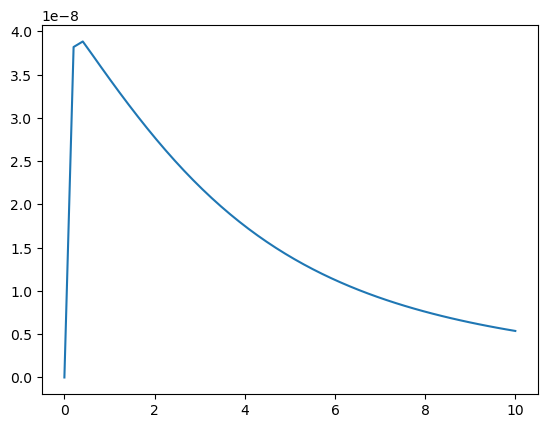

In [21]:
#b
import numpy as np
from scipy.integrate import quad

N = 50
x, w = np.polynomial.legendre.leggauss(N)

G = 6.674e-11
m = 1
ro = 100
f = lambda x,y,z: (x**2 + y**2 + z**2)**(-3/2)

def Fuerza(z):
    a = -5
    b = 5
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    yp = xp
    wp = 0.5*(b-a)*w
    s = 0
    for i in range(N):
        for j in range(N):
            s+=wp[i]*wp[j]*f(xp[i],yp[j],z)
    F = G*m*ro*z*s
    return F
z = np.linspace(0,10,50)
F = [Fuerza(zi) for zi in z]
plt.plot(z,F)


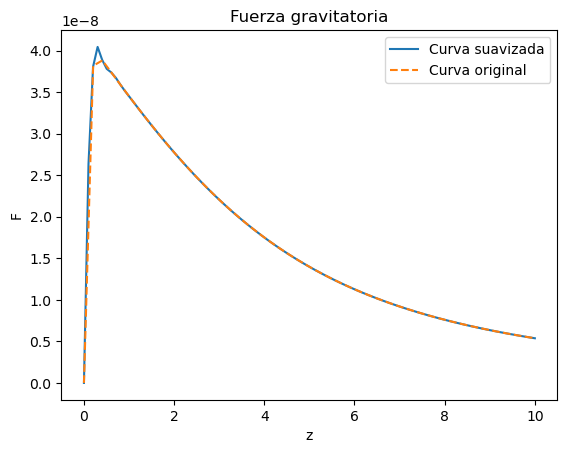

In [15]:
#c
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.integrate import quad
import matplotlib.pyplot as plt

N = 50
x, w = np.polynomial.legendre.leggauss(N)

G = 6.674e-11
m = 1
ro = 100

f = lambda x, y, z: (x**2 + y**2 + z**2)**(-3/2)

def Fuerza(z):
    a = -5
    b = 5
    xp = 0.5 * (b - a) * x + 0.5 * (b + a)
    yp = xp
    wp = 0.5 * (b - a) * w
    s = 0
    for i in range(N):
        for j in range(N):
            s += wp[i] * wp[j] * f(xp[i], yp[j], z)
    F = G * m * ro * z * s
    return F

z = np.linspace(0, 10, 50)
F = [Fuerza(zi) for zi in z]

# Crea una spline para hacer la curva más suave
spline = make_interp_spline(z, F)

# Genera nuevos puntos para la curva suavizada
z_new = np.linspace(0, 10, 100)
F_new = spline(z_new)

# Plotea la curva suavizada
plt.plot(z_new, F_new)

# Plotea la curva original para comparación
plt.plot(z, F, linestyle='--')

plt.xlabel('z')
plt.ylabel('F')
plt.title('Fuerza gravitatoria')
plt.legend(['Curva suavizada', 'Curva original'])
plt.show()

#De cierta manera suvizamos la curva , podriamos hacer un zoom a la frafica para que solo nos centremos en la curva y asi eliminar la recta 
#que aparece

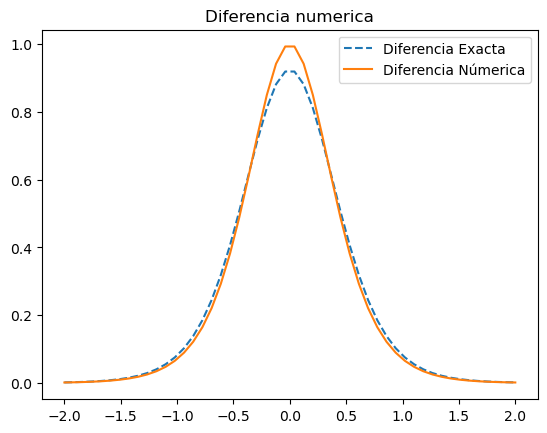

In [36]:
#Ejercicio 6
from __future__ import division, print_function
from math import tanh
from pylab import *
import matplotlib.pyplot as plt

f = lambda x: 1 + 1/2*tanh(2*x)

h = 0.5

x = linspace(-2,2)
f_diff = (f(x + h/2) - f(x - h/2))/h
f_diff_a = -tanh(2*x)**2 + 1

plt.title("Diferencia numerica")
plt.plot(x,f_diff,'--')
plt.plot(x,f_diff_a,'-')
plt.legend(["Diferencia Exacta","Diferencia Númerica"])